In [13]:
import pickle
import cv2
import mediapipe as mp
import os

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

DATA_DIR = './TRAIN'

data = []
labels = []

# Buka file data.txt untuk ditulisi
with open('../train_data.txt', 'w') as txt_file:
    for dir_ in os.listdir(DATA_DIR):
        for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
            data_aux = []
            x_ = []
            y_ = []

            img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            results = hands.process(img_rgb)
            if results.multi_hand_landmarks:
                for hand_landmarks in results.multi_hand_landmarks:
                    for i in range(len(hand_landmarks.landmark)):
                        x = hand_landmarks.landmark[i].x
                        y = hand_landmarks.landmark[i].y
                        x_.append(x)
                        y_.append(y)

                    for i in range(len(hand_landmarks.landmark)):
                        x = hand_landmarks.landmark[i].x
                        y = hand_landmarks.landmark[i].y
                        data_aux.append(x - min(x_))
                        data_aux.append(y - min(y_))

                data.append(data_aux)
                labels.append(dir_)

                # Tulis ke file data.txt (gabungkan semua data + label)
                txt_file.write(','.join(map(str, data_aux)) + f',{dir_}\n')

# Simpan ke pickle
with open('../train_data.pickle', 'wb') as f:
    pickle.dump({'data': data, 'labels': labels}, f)


x: 0.2622
y: 0.560117245
z: -6.95941708e-007

x: 0.349133134
y: 0.48428309
z: -0.0181994103

x: 0.400281876
y: 0.360210568
z: -0.023303099

x: 0.4247289
y: 0.253121018
z: -0.0308107343

x: 0.451599807
y: 0.178310186
z: -0.0321617126

x: 0.362772495
y: 0.273671865
z: 0.00553187728

x: 0.378248483
y: 0.198170811
z: -0.0360147394

x: 0.364153355
y: 0.290386021
z: -0.0542702302

x: 0.34943065
y: 0.343101114
z: -0.0573817566

x: 0.305382
y: 0.271724105
z: 0.00162123737

x: 0.316520214
y: 0.197231
z: -0.0413378067

x: 0.313016623
y: 0.313086033
z: -0.0453382432

x: 0.309039205
y: 0.363847166
z: -0.0352158733

x: 0.250226766
y: 0.282581806
z: -0.00933320913

x: 0.258989632
y: 0.207614586
z: -0.0538965315

x: 0.267039418
y: 0.323917568
z: -0.0336073153

x: 0.269127727
y: 0.3795892
z: -0.00524352398

x: 0.194637418
y: 0.30421412
z: -0.0215687919

x: 0.207149655
y: 0.236770362
z: -0.0446053222

x: 0.221816063
y: 0.315919101
z: -0.0232756604

x: 0.226739377
y: 0.361600459
z: 0.00179227209

x: 0.5

C:\Users\ACER\AppData\Local\Temp\ipykernel_3464\945503734.py:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


x: 0.348662078
y: 0.690417051
z: 1.91374383e-007

x: 0.395115733
y: 0.654299855
z: -0.0365329161

x: 0.434598953
y: 0.588084698
z: -0.0623074099

x: 0.417377859
y: 0.541143894
z: -0.0860740766

x: 0.370888472
y: 0.525792
z: -0.108691782

x: 0.392274499
y: 0.454912961
z: -0.0436010659

x: 0.39389962
y: 0.387905478
z: -0.0850144699

x: 0.401554644
y: 0.346446931
z: -0.112678267

x: 0.404819191
y: 0.308074653
z: -0.132145

x: 0.335347205
y: 0.457442969
z: -0.0472129732

x: 0.331016243
y: 0.430718035
z: -0.0965358764

x: 0.351384252
y: 0.515795
z: -0.108392052

x: 0.358880877
y: 0.547661543
z: -0.108383685

x: 0.288811415
y: 0.486749738
z: -0.0554227047

x: 0.291655928
y: 0.490828395
z: -0.102124579

x: 0.319457144
y: 0.560980082
z: -0.0922069848

x: 0.328847706
y: 0.575933933
z: -0.0772644803

x: 0.250216156
y: 0.531003416
z: -0.0673564523

x: 0.266553044
y: 0.552956283
z: -0.0968724

x: 0.292317778
y: 0.597766817
z: -0.0889282599

x: 0.301551163
y: 0.600352287
z: -0.0784111097

x: 0.3579

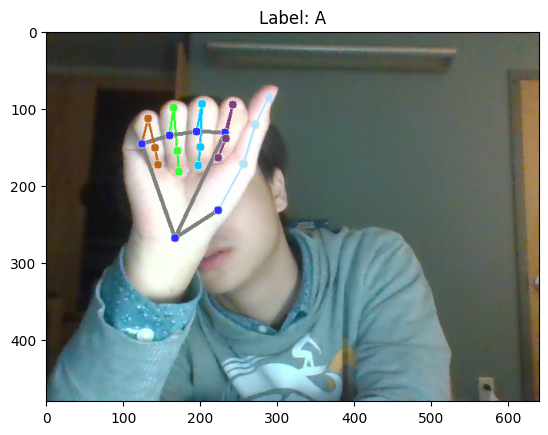

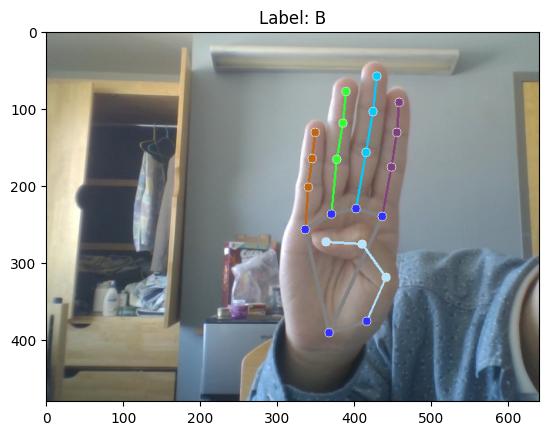

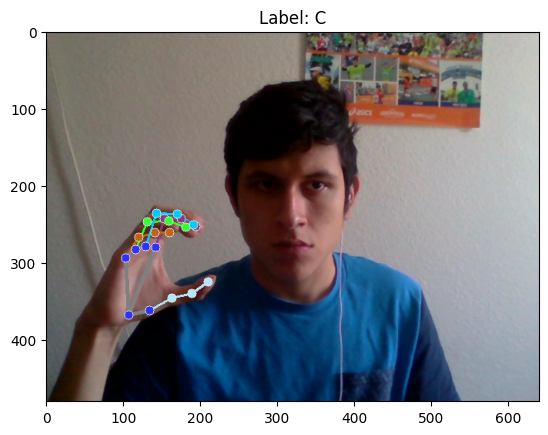

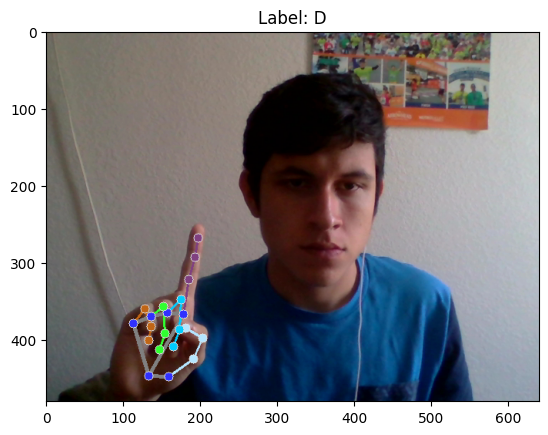

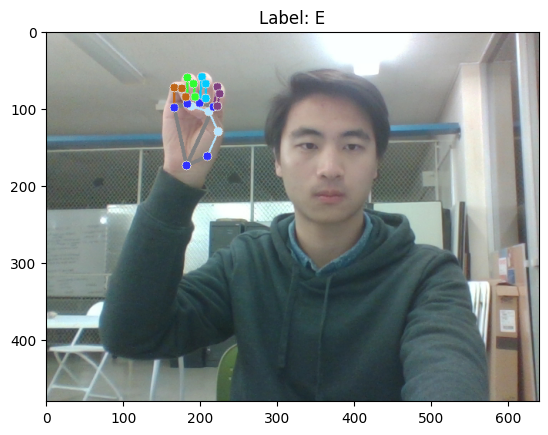

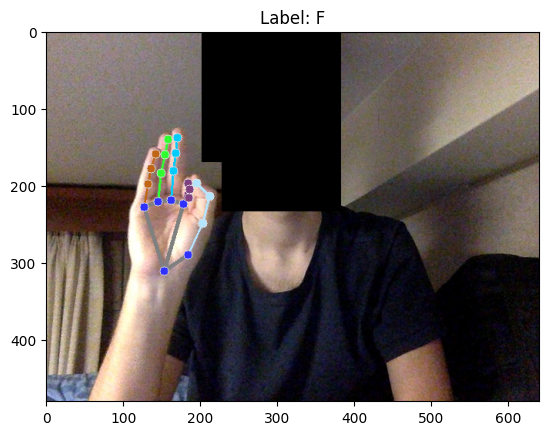

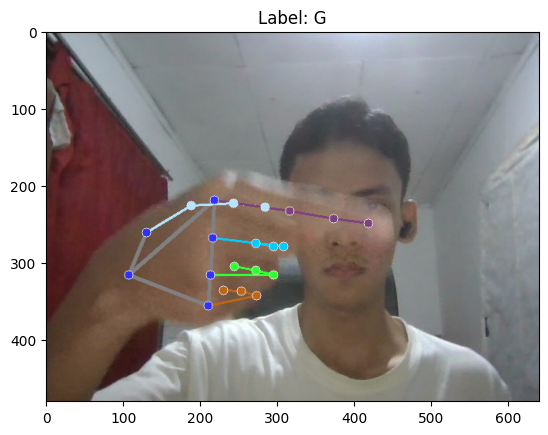

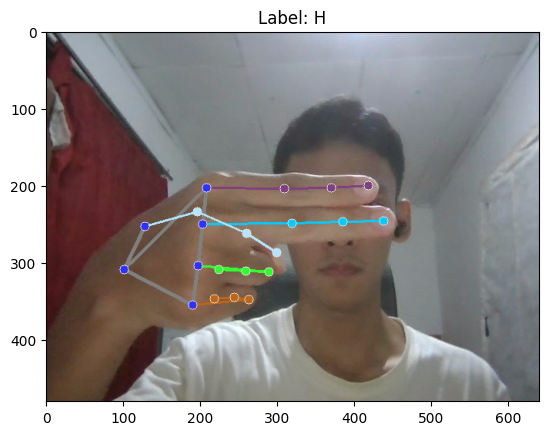

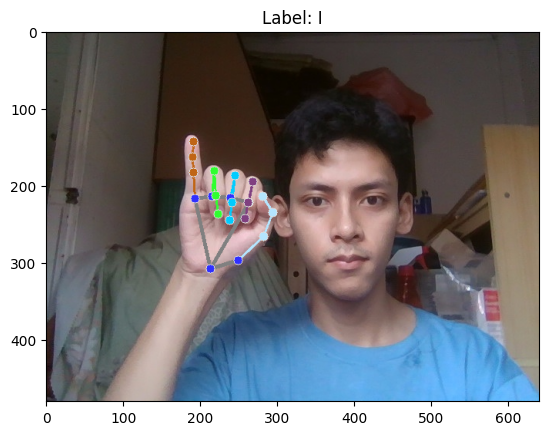

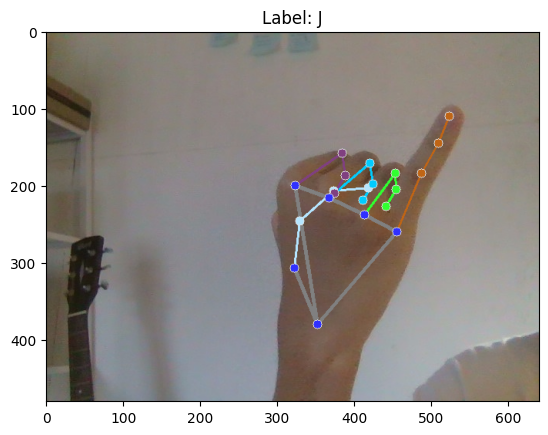

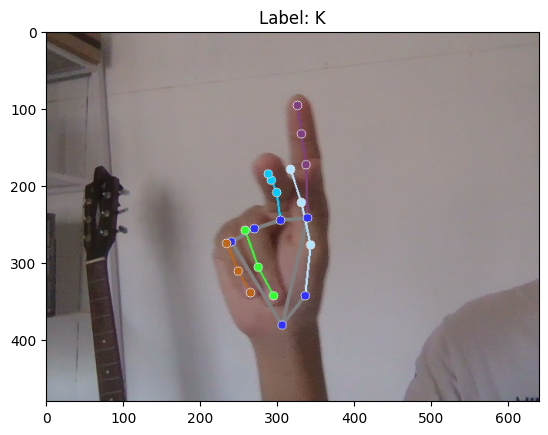

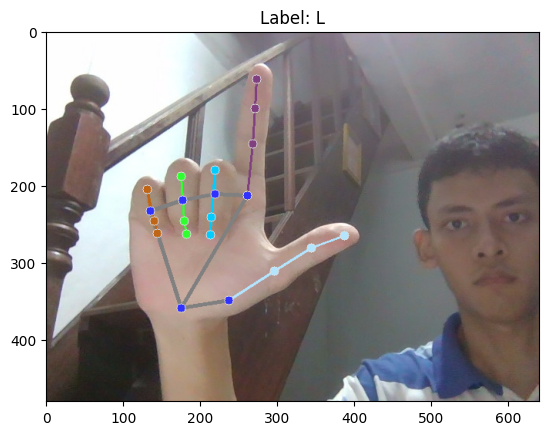

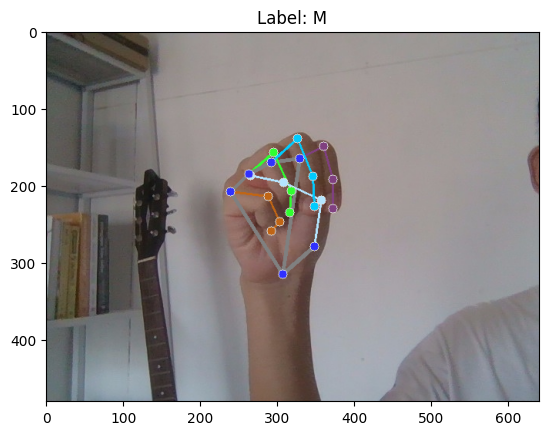

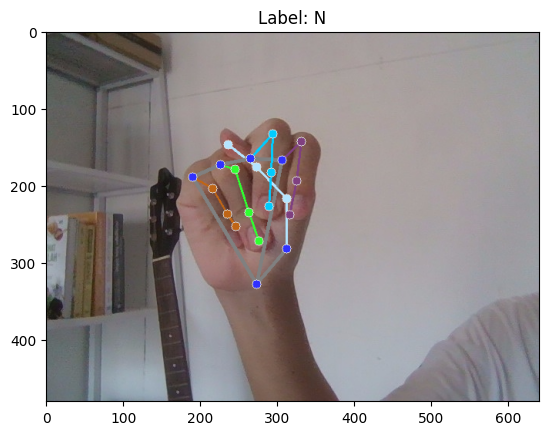

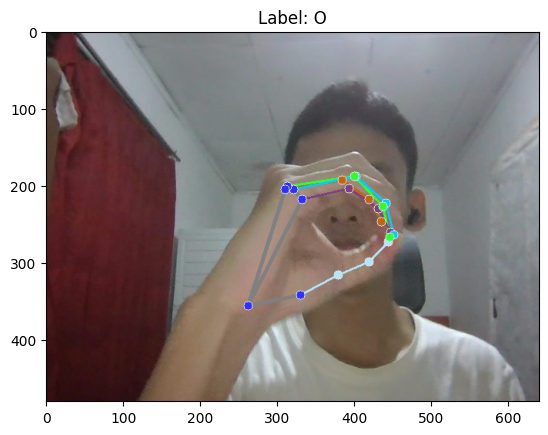

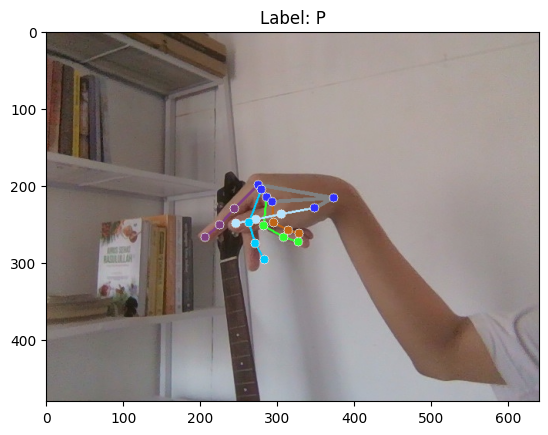

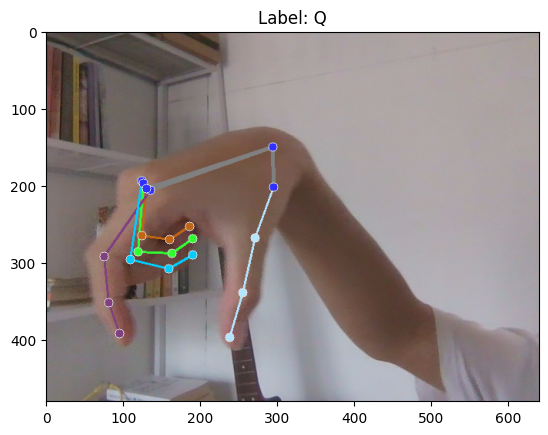

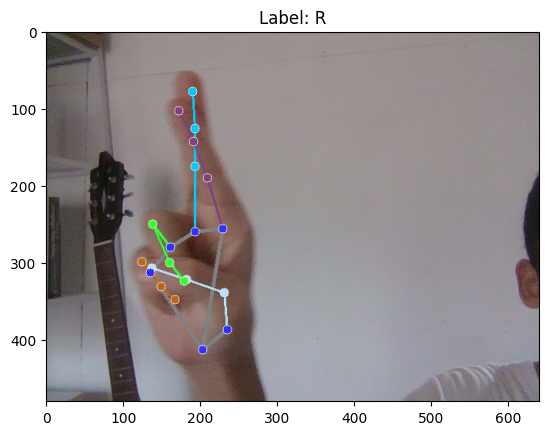

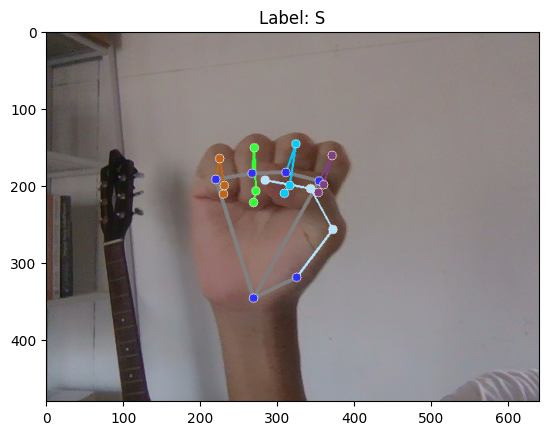

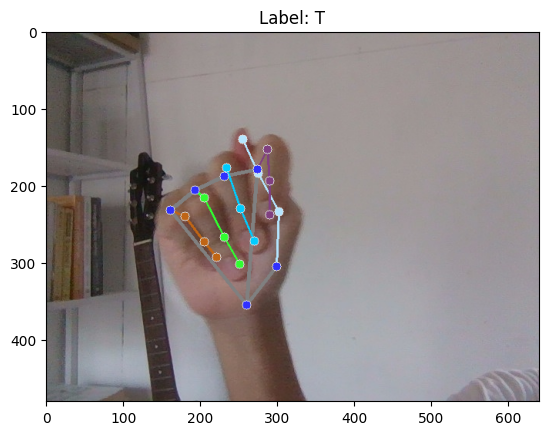

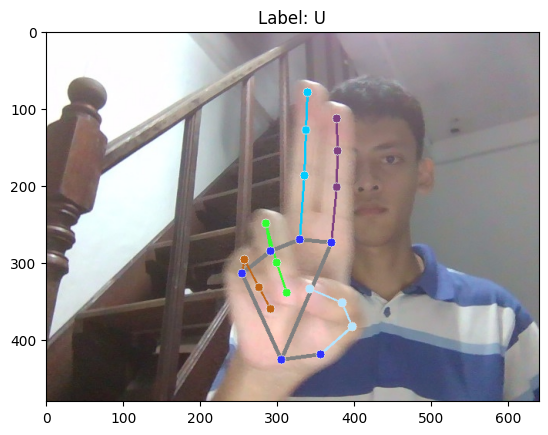

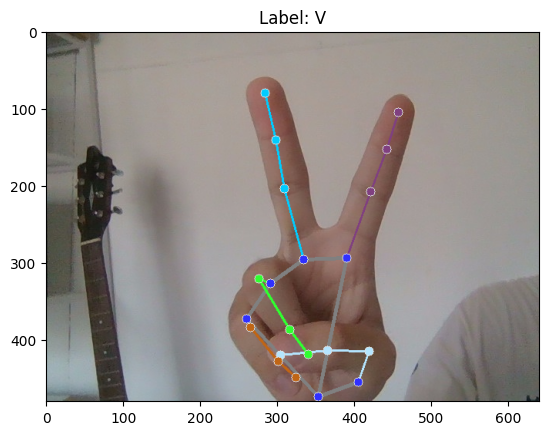

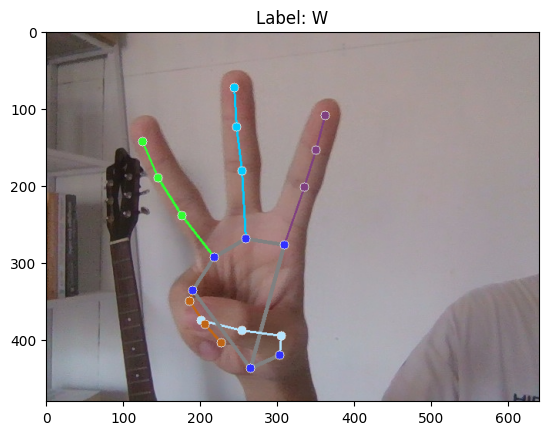

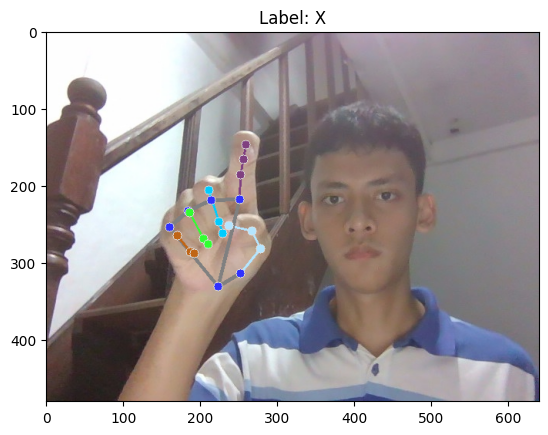

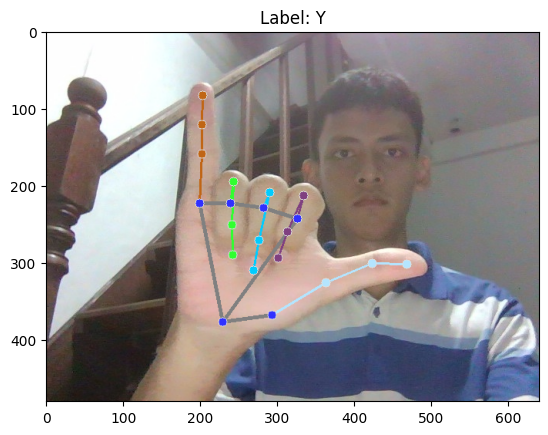

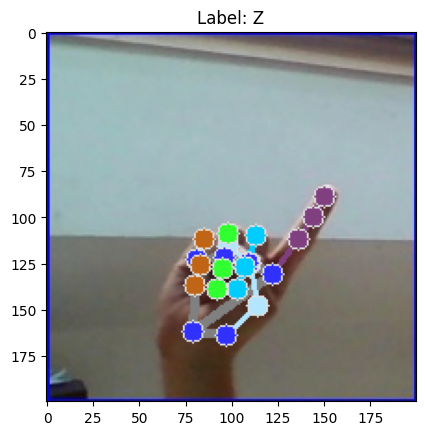

In [14]:
# Ekstraksi Fitur + Landmark
import os
import pickle
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

DATA_DIR = './TRAIN'

data = []
labels = []

for dir_ in os.listdir(DATA_DIR):
    img_list = os.listdir(os.path.join(DATA_DIR, dir_))
    img_list.sort()  # urutkan biar median konsisten
    median_idx = len(img_list) // 2
    img_path = img_list[median_idx]  # ambil gambar tengah

    data_aux = []
    img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    results = hands.process(img_rgb)
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                img_rgb,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style()
            )
            for i in range(len(hand_landmarks.landmark)):
                print(hand_landmarks.landmark[i])
                data_aux.append([
                    hand_landmarks.landmark[i].x,
                    hand_landmarks.landmark[i].y,
                ])
        data.append(data_aux)
        labels.append(dir_)

    plt.figure()
    plt.title(f'Label: {dir_}')
    plt.imshow(img_rgb)

plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_3464\2973340834.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()), palette="viridis")


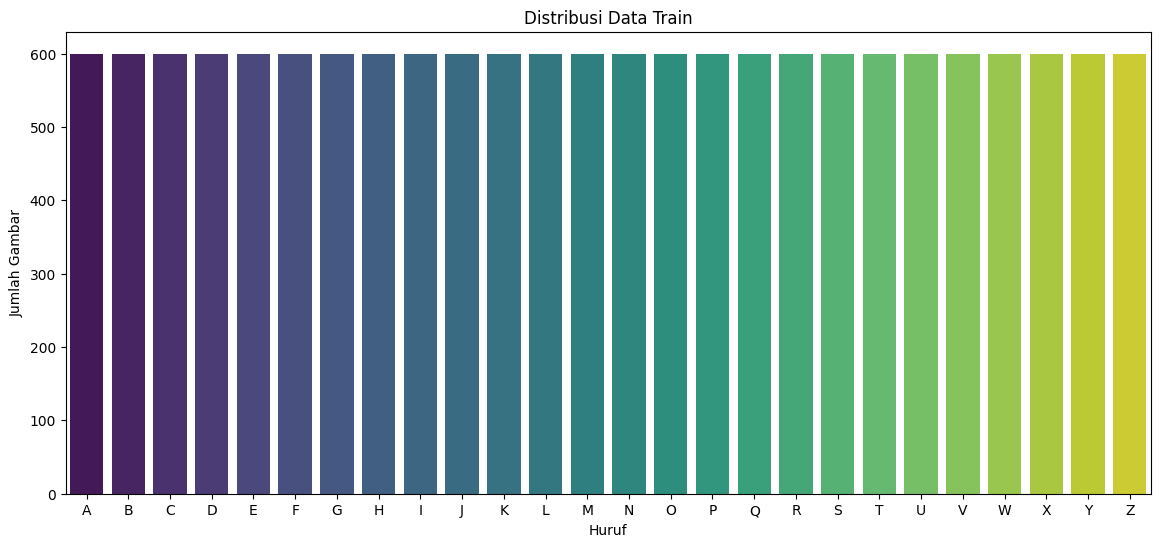

In [15]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

DATA_DIR = './TRAIN'

# Hitung jumlah file per folder/huruf
label_counts = {}
for dir_ in os.listdir(DATA_DIR):
    dir_path = os.path.join(DATA_DIR, dir_)
    if os.path.isdir(dir_path):
        num_files = len([file for file in os.listdir(dir_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))])
        label_counts[dir_] = num_files

# Urutkan berdasarkan abjad label
label_counts = dict(sorted(label_counts.items()))

# Visualisasi pakai seaborn
plt.figure(figsize=(14, 6))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()), palette="viridis")
plt.title('Distribusi Data Train')
plt.xlabel('Huruf')
plt.ylabel('Jumlah Gambar')
plt.show()


In [21]:
import pickle
import cv2
import mediapipe as mp
import os

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

DATA_DIR = './TEST'

data = []
labels = []

# Buka file data.txt untuk ditulisi
with open('../test_data.txt', 'w') as txt_file:
    for dir_ in os.listdir(DATA_DIR):
        for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
            data_aux = []
            x_ = []
            y_ = []

            img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            results = hands.process(img_rgb)
            if results.multi_hand_landmarks:
                for hand_landmarks in results.multi_hand_landmarks:
                    for i in range(len(hand_landmarks.landmark)):
                        x = hand_landmarks.landmark[i].x
                        y = hand_landmarks.landmark[i].y
                        x_.append(x)
                        y_.append(y)

                    for i in range(len(hand_landmarks.landmark)):
                        x = hand_landmarks.landmark[i].x
                        y = hand_landmarks.landmark[i].y
                        data_aux.append(x - min(x_))
                        data_aux.append(y - min(y_))

                data.append(data_aux)
                labels.append(dir_)

                # Tulis ke file data.txt (gabungkan semua data + label)
                txt_file.write(','.join(map(str, data_aux)) + f',{dir_}\n')

# Simpan ke pickle
with open('../test_data.pickle', 'wb') as f:
    pickle.dump({'data': data, 'labels': labels}, f)

In [17]:
# # Ekstraksi Fitur + Landmark
# import os
# import pickle
# import cv2
# import mediapipe as mp
# import matplotlib.pyplot as plt

# mp_hands = mp.solutions.hands
# mp_drawing = mp.solutions.drawing_utils
# mp_drawing_styles = mp.solutions.drawing_styles

# hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

# DATA_DIR = './TEST'

# data = []
# labels = []

# for dir_ in os.listdir(DATA_DIR):
#     img_list = os.listdir(os.path.join(DATA_DIR, dir_))
#     img_list.sort()  # urutkan biar median konsisten
#     median_idx = len(img_list) // 2
#     img_path = img_list[median_idx]  # ambil gambar tengah

#     data_aux = []
#     img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
#     img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
#     results = hands.process(img_rgb)
#     if results.multi_hand_landmarks:
#         for hand_landmarks in results.multi_hand_landmarks:
#             mp_drawing.draw_landmarks(
#                 img_rgb,
#                 hand_landmarks,
#                 mp_hands.HAND_CONNECTIONS,
#                 mp_drawing_styles.get_default_hand_landmarks_style(),
#                 mp_drawing_styles.get_default_hand_connections_style()
#             )
#             for i in range(len(hand_landmarks.landmark)):
#                 print(hand_landmarks.landmark[i])
#                 data_aux.append([
#                     hand_landmarks.landmark[i].x,
#                     hand_landmarks.landmark[i].y,
#                 ])
#         data.append(data_aux)
#         labels.append(dir_)

#     plt.figure()
#     plt.title(f'Label: {dir_}')
#     plt.imshow(img_rgb)

# plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_3464\1764728462.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()), palette="viridis")


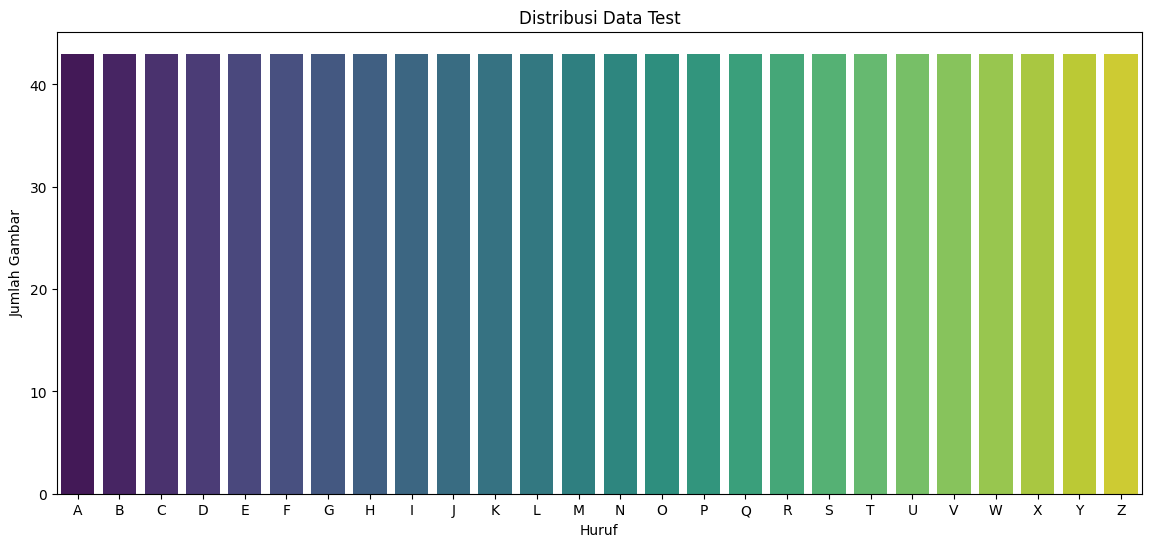

In [22]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

DATA_DIR = './TEST'

# Hitung jumlah file per folder/huruf
label_counts = {}
for dir_ in os.listdir(DATA_DIR):
    dir_path = os.path.join(DATA_DIR, dir_)
    if os.path.isdir(dir_path):
        num_files = len([file for file in os.listdir(dir_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))])
        label_counts[dir_] = num_files

# Urutkan berdasarkan abjad label
label_counts = dict(sorted(label_counts.items()))

# Visualisasi pakai seaborn
plt.figure(figsize=(14, 6))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()), palette="viridis")
plt.title('Distribusi Data Test')
plt.xlabel('Huruf')
plt.ylabel('Jumlah Gambar')
plt.show()